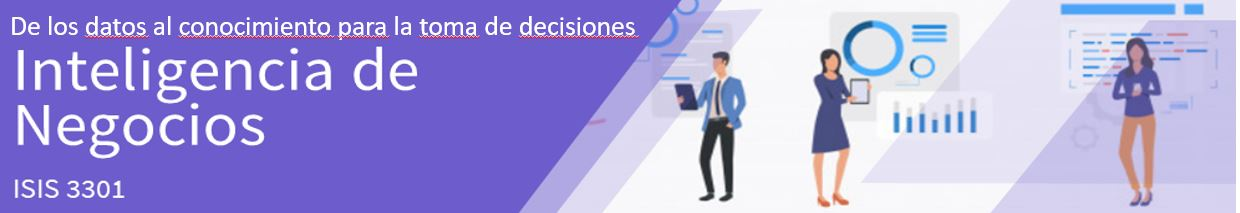

# Entendimiento de Datos
En este cuaderno revisaremos dos aspectos grandes del entendimiento de datos: el perfilamiento y la calidad de los datos. Adicionalmente, se dan una serie de funciones para facilitar la manipulación de los datos.
* Inicio
    * Carga
    * Manipulación Básica

* Perfilamiento de Datos
    * Exploración
    * Visualización

* Calidad de Datos:
  * Completitud
  * Unicidad
  * Consistencia y validez 

* Resumenes automáticos para el entendimiento

Para la limpieza de los datos utilizaremos la libreria de **Pandas** (https://pandas.pydata.org/) y para la visualización de los datos, usaremos: **Seaborn**(https://seaborn.pydata.org/) y **Matplotlib** (https://matplotlib.org/).

## Los Datos
Trabajaremos con una base de datos de accidentes de BiciAlpes. 

La base de datos original, la pueden encontrar aquí: **

# 1. Inicio

## 1.1 Carga

### 1.1.1 Librerias
En caso de no tener instaladas las librerías, recuerde que lo puede hacer desde la interfaz de Anaconda o directamente desde el cuaderno usando alguno de los siguientes comandos:

Si está usando Anaconda
```python
import sys
!conda install --yes --prefix {sys.prefix} pandas
```

Si está usando Pip
```python
import sys
!{sys.executable} -m pip install numpy
```

In [3]:
# Librerias generales
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar
# Ranom seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
# Ubicación de la base de datos
# Recuerda ajustar esta ubicación en caso de cambiarla
db_location = './data/Datos_BiciAlpesPerfilamiento.csv'

In [5]:
# Cargar los datos
df_bicis=pd.read_csv(db_location, sep=';', encoding = "ISO-8859-1")

In [6]:
# Dimensiones de los datos
df_bicis.shape

(5338, 17)

In [8]:
# Ver los datos
display(df_bicis.sample(5)) # Muestra
#display(df_bicis.head(5)) # Primeras Filas
#display(df_bicis.tail(5)) # Ultimas Filas

Unnamed: 0    Time  Number_of_Casualties    Day_of_Week  Road_Type  \
4793        4793  Mañana                    -1  Fin de semana          6   
2544        2544   Noche                    -1    Día laboral          6   
5172        5172   Tarde                    -1    Día laboral          6   
408          408   Tarde                    -1    Día laboral          2   
330          330   Tarde                    -1  Fin de semana          6   

      Speed_limit  Light_Conditions  Weather_Conditions  \
4793         30.0                 1                 1.0   
2544         30.0                 4                 1.0   
5172         50.0                 1                 1.0   
408          20.0                 1                 2.0   
330          30.0                 1                 1.0   

      Road_Surface_Conditions  Urban_or_Rural_Area Vehicle_Type  \
4793                        1                    1         bike   
2544                        1                    1         bike   
5172                        1                    2         bike   
408                         2                    1         bike   
330                         1                    1         bike   

      Did_Police_Officer_Attend_Scene_of_Accident  Junction_Detail  \
4793                                            1                3   
2544                                            1                6   
5172                                            1                3   
408                                             1                0   
330                                             2                3   

      Number_of_Vehicles  Accident_Severity  Unnamed: 14     Accident_Date  
4793                   1                  3          NaN  17/05/2022 22:34  
2544                   1                  3          NaN   10/09/2022 9:12  
5172                   1                  2          NaN   2/04/2023 19:27  
408                    1                  3          NaN  15/09/2022 13:12  
330                    1                  3          NaN   12/04/2023 2:29

## 1.2 Manipulación Básica

En esta parte del Cuaderno la idea es que se familarice con algunos comandos que van a permitir manipular mejor los datos y avanzar en la comprensión de los mismos, muy de la mano del diccionario de datos.

In [9]:
# Imprimimos los diferentes tipos de las columnas
df_bicis.dtypes

Unnamed: 0                                       int64
Time                                            object
Number_of_Casualties                             int64
Day_of_Week                                     object
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                             float64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Vehicle_Type                                    object
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
Accident_Date                                   object
dtype: object

In [10]:
# Seleccionar las columnas numéricas
number_cols = df_bicis.dtypes[(df_bicis.dtypes == np.int64) | (df_bicis.dtypes == np.float64)].index
number_cols = df_bicis.select_dtypes(include = ['int','float']).columns
number_cols

Index(['Unnamed: 0', 'Number_of_Casualties', 'Road_Type', 'Speed_limit',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Detail', 'Number_of_Vehicles', 'Accident_Severity',
       'Unnamed: 14'],
      dtype='object')

In [11]:
# Resumen de las principales estadísticas de las variables numéricas
df_bicis[number_cols].describe()

Unnamed: 0  Number_of_Casualties    Road_Type  Speed_limit  \
count  5338.000000           5338.000000  5338.000000  5338.000000   
mean   2668.500000             -1.118022     5.587486    33.522855   
std    1541.092199              0.330694     1.416573    10.206576   
min       0.000000             -4.000000     1.000000    15.000000   
25%    1334.250000             -1.000000     6.000000    30.000000   
50%    2668.500000             -1.000000     6.000000    30.000000   
75%    4002.750000             -1.000000     6.000000    30.000000   
max    5337.000000             -1.000000     9.000000    70.000000   

       Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
count       5338.000000         5257.000000              5338.000000   
mean           1.712814            1.224843                 2.207756   
std            1.456428            0.528171                 7.936541   
min            1.000000            1.000000                 1.000000   
25%            1.000000            1.000000                 1.000000   
50%            1.000000            1.000000                 1.000000   
75%            1.000000            1.000000                 1.000000   
max            7.000000            5.000000                66.000000   

       Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
count          5338.000000                                  5338.000000   
mean              1.243162                                     1.247096   
std               0.429032                                     0.453389   
min               1.000000                                    -1.000000   
25%               1.000000                                     1.000000   
50%               1.000000                                     1.000000   
75%               1.000000                                     1.000000   
max               2.000000                                     3.000000   

       Junction_Detail  Number_of_Vehicles  Accident_Severity  Unnamed: 14  
count      5338.000000         5338.000000        5338.000000          0.0  
mean          1.898464            1.001124           2.630761          NaN  
std           2.456249            0.033511           0.518214          NaN  
min          -1.000000            1.000000           1.000000          NaN  
25%           0.000000            1.000000           2.000000          NaN  
50%           0.000000            1.000000           3.000000          NaN  
75%           3.000000            1.000000           3.000000          NaN  
max           9.000000            2.000000           3.000000          NaN

In [12]:
# Resumenes individuales que pueden ser calculados de forma manual
df_bicis.Number_of_Casualties.mean()
#df_bicis.Number_of_Casualties.sum()
#df_bicis.Number_of_Casualties.std()

-1.1180217309853877

**Ejercicio**
Revise los resúmenes de las variables, ¿Hay alguna columna que le parezca que no sea numérica ordinal sino tal vez categórica?

¿Cómo se puede corregir? 

In [13]:
# Solución
# La variable "Road_Type" en realidad es una variable categórica si revisamos el diccionario de datos, encontramos que: 
# Road_Type	categórica	Tipo de vía (Rotonda = 1, De un solo sentido = 2, Autovía = 3, Calzada =6, Circunvalación = 7, Desconocida = 9).

# Revisar los valores que tiene
print(df_bicis.Road_Type.value_counts())


6    4475
3     312
2     253
9     141
1     139
7      18
Name: Road_Type, dtype: int64


#### 1.2.1 Datos de Fechas

In [11]:
# la columna Accident_Date deberia ser fecha pero es object
df_bicis.Accident_Date.tail(10)

5328     5/12/2022 14:55
5329    25/12/2022 19:27
5330    25/06/2022 11:54
5331     22/12/2022 0:27
5332    29/05/2022 17:18
5333    26/06/2022 23:55
5334     29/12/2022 8:11
5335     3/11/2022 21:27
5336      2/04/2023 3:14
5337      9/09/2022 5:13
Name: Accident_Date, dtype: object

In [12]:
# Una nueva columna con la fecha como DateTime, pero para el manejo de errores se utiliza la opción 'coerce'.
# ¿Sabes qué significa?
df_bicis['new_Accident_Date'] = pd.to_datetime(df_bicis.Accident_Date, errors = 'coerce')
df_bicis['new_Accident_Date'].tail(10)

5328   2022-05-12 14:55:00
5329   2022-12-25 19:27:00
5330   2022-06-25 11:54:00
5331   2022-12-22 00:27:00
5332   2022-05-29 17:18:00
5333   2022-06-26 23:55:00
5334   2022-12-29 08:11:00
5335   2022-03-11 21:27:00
5336   2023-02-04 03:14:00
5337   2022-09-09 05:13:00
Name: new_Accident_Date, dtype: datetime64[ns]

In [13]:
# Miramos los registros que no pudieron convertirse a DateTime e identificamos la estrategia para corregir el problema
# En este caso se da por diferentes formatos que tiene y la propuesta es llevarlos al mismo formato para poderlo manipular como tipo DateTime
df_bicis.loc[df_bicis.new_Accident_Date.isna(), ['Accident_Date','new_Accident_Date']] 

Accident_Date new_Accident_Date
1990  Dia 16 mes 09 annio 2022  3:31:00 p. m.               NaT

In [14]:
# Corregimos el problema de formato
new_dates = df_bicis.Accident_Date[df_bicis.new_Accident_Date.isna()]
print(new_dates)
new_dates = new_dates.apply(lambda s: pd.to_datetime(str(s).replace('Dia ','').replace(' mes ','/').replace(' annio ','/')))
print(new_dates)
df_bicis.loc[df_bicis.new_Accident_Date.isna(),'new_Accident_Date'] = new_dates
#df_bicis['new_Accident_Date'].replace('Dia ','').replace(' mes ','/').replace(' annio ','/')  

# Mirar resultados
df_bicis[['Accident_Date','new_Accident_Date']].sample(10)

1990    Dia 16 mes 09 annio 2022  3:31:00 p. m.
Name: Accident_Date, dtype: object
1990   2022-09-16 15:31:00
Name: Accident_Date, dtype: datetime64[ns]


Accident_Date   new_Accident_Date
4793  17/05/2022 22:34 2022-05-17 22:34:00
2544   10/09/2022 9:12 2022-10-09 09:12:00
5172   2/04/2023 19:27 2023-02-04 19:27:00
408   15/09/2022 13:12 2022-09-15 13:12:00
330    12/04/2023 2:29 2023-12-04 02:29:00
3048    5/06/2022 2:24 2022-05-06 02:24:00
4995  16/05/2023 20:45 2023-05-16 20:45:00
203   22/07/2022 12:08 2022-07-22 12:08:00
1154  15/05/2023 20:48 2023-05-15 20:48:00
130    5/11/2022 12:07 2022-05-11 12:07:00

In [15]:
#Corroborar que se quitaron las fechas nulas por el problema del formato
df_bicis.loc[df_bicis.new_Accident_Date.isna(), ['Accident_Date','new_Accident_Date']] 

Empty DataFrame
Columns: [Accident_Date, new_Accident_Date]
Index: []

In [16]:
# Agregar el año del accidente como una columna adicional
df_bicis['Accident_Year'] = df_bicis.new_Accident_Date.dt.year
df_bicis[['Accident_Date','new_Accident_Date','Accident_Year']].sample(10)

#¿Qué tal hacer algo similar para tener la hora del accidente en otra columna?

Accident_Date   new_Accident_Date  Accident_Year
4228   6/12/2022 20:34 2022-06-12 20:34:00           2022
4485   30/07/2022 9:55 2022-07-30 09:55:00           2022
2755   16/08/2022 1:07 2022-08-16 01:07:00           2022
537   23/07/2022 23:24 2022-07-23 23:24:00           2022
4993  20/07/2022 14:41 2022-07-20 14:41:00           2022
880   25/08/2022 22:23 2022-08-25 22:23:00           2022
3174   15/02/2023 1:58 2023-02-15 01:58:00           2023
1526  14/05/2022 12:42 2022-05-14 12:42:00           2022
1223   18/06/2022 1:43 2022-06-18 01:43:00           2022
2422   1/08/2022 22:37 2022-01-08 22:37:00           2022

**Ejercicio**
Crear una columna que se llame *Days_Since_Accident* donde se encuentre el número de días que han pasado desde que ocurrió el accidente. La idea es que busquen en internet como se hace esto para practicar la busqueda en foros.

In [17]:
# Solución
today = pd.to_datetime('today')
df_bicis['Days_Since_Accident'] = df_bicis['new_Accident_Date'].apply(lambda d: (today - d).days)
df_bicis[['Accident_Date','new_Accident_Date','Accident_Year','Days_Since_Accident']].sample(10)

Accident_Date   new_Accident_Date  Accident_Year  Days_Since_Accident
1483    3/08/2022 5:52 2022-03-08 05:52:00           2022                  524
2311  14/06/2022 21:49 2022-06-14 21:49:00           2022                  425
2323   24/07/2022 5:28 2022-07-24 05:28:00           2022                  386
54     24/02/2023 3:44 2023-02-24 03:44:00           2023                  171
4707  17/05/2022 23:00 2022-05-17 23:00:00           2022                  453
116   22/05/2023 18:55 2023-05-22 18:55:00           2023                   83
3418    6/01/2023 9:08 2023-06-01 09:08:00           2023                   73
34    16/05/2022 14:29 2022-05-16 14:29:00           2022                  454
4935    4/03/2023 2:21 2023-04-03 02:21:00           2023                  133
5067   10/05/2023 1:29 2023-10-05 01:29:00           2023                  -52

# 2. Perfilamiento de Datos

En este punto es importante explorar los datos para conocerlos mejor. Una forma de realizarlo es revisando los datos y algo que facilita el proceso es la visualización de los mismos.

#### 2.1 Datos numéricos

In [18]:
# Revisemos y pensemos nuevamente en las dimensiones de los datos
df_bicis.shape

(5338, 20)

In [19]:
# Se obtienen las estadísticas principales de las columnas numéricas
df_bicis.describe()

Unnamed: 0  Number_of_Casualties    Road_Type  Speed_limit  \
count  5338.000000           5338.000000  5338.000000  5338.000000   
mean   2668.500000             -1.118022     5.587486    33.522855   
std    1541.092199              0.330694     1.416573    10.206576   
min       0.000000             -4.000000     1.000000    15.000000   
25%    1334.250000             -1.000000     6.000000    30.000000   
50%    2668.500000             -1.000000     6.000000    30.000000   
75%    4002.750000             -1.000000     6.000000    30.000000   
max    5337.000000             -1.000000     9.000000    70.000000   

       Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
count       5338.000000         5257.000000              5338.000000   
mean           1.712814            1.224843                 2.207756   
std            1.456428            0.528171                 7.936541   
min            1.000000            1.000000                 1.000000   
25%            1.000000            1.000000                 1.000000   
50%            1.000000            1.000000                 1.000000   
75%            1.000000            1.000000                 1.000000   
max            7.000000            5.000000                66.000000   

       Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
count          5338.000000                                  5338.000000   
mean              1.243162                                     1.247096   
std               0.429032                                     0.453389   
min               1.000000                                    -1.000000   
25%               1.000000                                     1.000000   
50%               1.000000                                     1.000000   
75%               1.000000                                     1.000000   
max               2.000000                                     3.000000   

       Junction_Detail  Number_of_Vehicles  Accident_Severity  Unnamed: 14  \
count      5338.000000         5338.000000        5338.000000          0.0   
mean          1.898464            1.001124           2.630761          NaN   
std           2.456249            0.033511           0.518214          NaN   
min          -1.000000            1.000000           1.000000          NaN   
25%           0.000000            1.000000           2.000000          NaN   
50%           0.000000            1.000000           3.000000          NaN   
75%           3.000000            1.000000           3.000000          NaN   
max           9.000000            2.000000           3.000000          NaN   

       Accident_Year  Days_Since_Accident  
count    5338.000000          5338.000000  
mean     2022.368115           274.189397  
std         0.482338           156.761319  
min      2022.000000          -114.000000  
25%      2022.000000           162.000000  
50%      2022.000000           287.000000  
75%      2023.000000           394.000000  
max      2023.000000           586.000000

In [20]:
# Note que también es posible utilizar 'dot notation' para acceder a una columna y calcular las estadísticas por variable
print(df_bicis.Number_of_Vehicles.mean())
print(df_bicis.Number_of_Vehicles.sum())
print(df_bicis.Number_of_Vehicles.std())

1.001124016485575
5344
0.033510646727358075


#### 2.2 Datos categóricos

In [21]:
# Se revisan los diferentes valores de una columna categórica con su respectiva frecuencia absoluta
df_bicis['Time'].value_counts()

Tarde        2171
Mañana       1681
Noche        1477
Madrugada       6
maniana         3
Name: Time, dtype: int64

In [22]:
# Es posible obligar a tener en cuenta valores nulos así como retornar la frecuencia relativa en lugar de la absoluta
df_bicis['Time'].value_counts(dropna = False, normalize = True)

Tarde        0.406707
Mañana       0.314912
Noche        0.276695
Madrugada    0.001124
maniana      0.000562
Name: Time, dtype: float64

#### 2.3 Datos de fechas

In [23]:
# Por defecto, Pandas carga las fechas como strings
df_bicis['new_Accident_Date'].sample(10).value_counts()

2022-10-30 10:24:00    1
2023-04-25 10:43:00    1
2023-03-25 07:29:00    1
2023-04-04 06:59:00    1
2023-02-25 08:24:00    1
2022-12-16 22:38:00    1
2023-04-16 04:10:00    1
2022-08-06 23:07:00    1
2023-03-16 05:21:00    1
2022-12-24 09:07:00    1
Name: new_Accident_Date, dtype: int64

In [24]:
# Por supuesto es posible transformar el tipo de dato para aplicar las funciones específicas del tipo de dato específico y comprenderlo mejor.
df_bicis['new_Accident_Date'] = pd.to_datetime(df_bicis['new_Accident_Date'])

In [25]:
df_bicis.dtypes

Unnamed: 0                                              int64
Time                                                   object
Number_of_Casualties                                    int64
Day_of_Week                                            object
Road_Type                                               int64
Speed_limit                                           float64
Light_Conditions                                        int64
Weather_Conditions                                    float64
Road_Surface_Conditions                                 int64
Urban_or_Rural_Area                                     int64
Vehicle_Type                                           object
Did_Police_Officer_Attend_Scene_of_Accident             int64
Junction_Detail                                         int64
Number_of_Vehicles                                      int64
Accident_Severity                                       int64
Unnamed: 14                                           float64
Accident

In [26]:
df_bicis['new_Accident_Date'].value_counts()

2022-09-11 11:42:00    2
2022-12-30 12:30:00    2
2022-08-22 16:13:00    2
2023-02-18 18:25:00    2
2023-03-02 09:04:00    2
                      ..
2022-07-22 08:54:00    1
2023-01-25 05:22:00    1
2022-09-11 00:09:00    1
2022-09-07 08:11:00    1
2022-10-31 20:04:00    1
Name: new_Accident_Date, Length: 5319, dtype: int64

#### 2.4 Visualización de Datos
Para la visualización, se puede utilizar tanto Seaborn como Matplotlib

Nos concentraremos en los datos de los accidentes con 2 vehículos involucrados

In [27]:
# Extraemos el número de vehiculos involucrados de acuerdo al número de victimas
df_limit = df_bicis[['Number_of_Casualties','Number_of_Vehicles']].groupby('Number_of_Vehicles').sum().sort_values('Number_of_Vehicles',ascending = False)
df_limit

Number_of_Casualties
Number_of_Vehicles                      
2                                    -12
1                                  -5956

### 2.4.1 Diagramas de Temporales

In [28]:
# Revisemos los accidentes donde hay un vehículo involucrado
df_plot = df_bicis.loc[df_bicis['Number_of_Vehicles']==1]
df_plot.shape

(5332, 20)

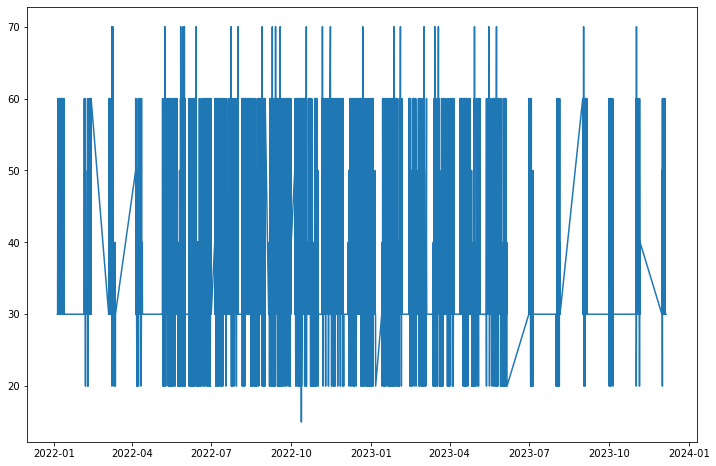

In [29]:
# Matplotlib
fig=plt.figure(figsize=(12,8))

df_plot = df_plot.sort_values('new_Accident_Date')
plt.plot(df_plot['new_Accident_Date'],df_plot['Speed_limit'])
plt.show()

<AxesSubplot:xlabel='new_Accident_Date', ylabel='Speed_limit'>

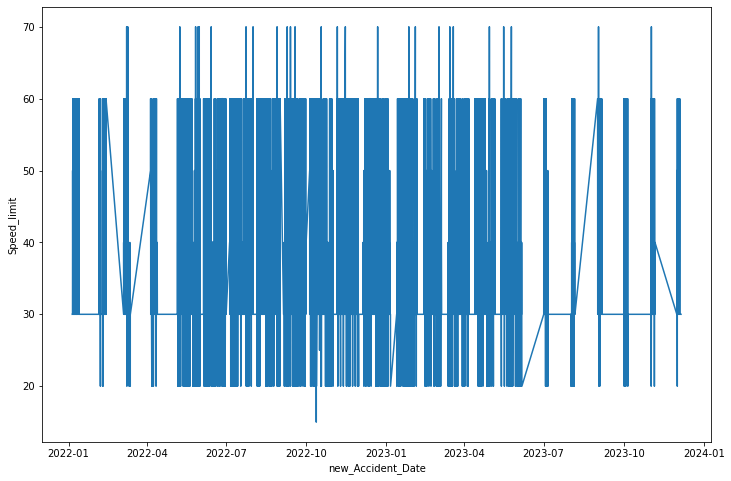

In [30]:
# Seaborn
fig=plt.figure(figsize=(12,8))
sns.lineplot(data = df_plot, x = 'new_Accident_Date', y = 'Speed_limit')

In [31]:
### 1.2 Diagrama de puntos (numérico vs. numérico)

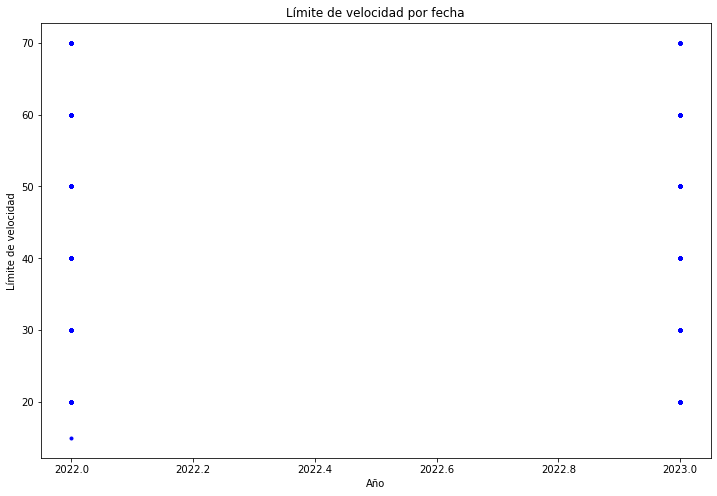

In [32]:
# Visualización de un scatter plot usando matplotlib
plt.figure(figsize = (12, 8))
plt.plot(df_plot['Accident_Year'], df_plot['Speed_limit'], '.', color = 'blue')
plt.title('Límite de velocidad por fecha')
plt.xlabel('Año')  
plt.ylabel('Límite de velocidad')  
plt.show()

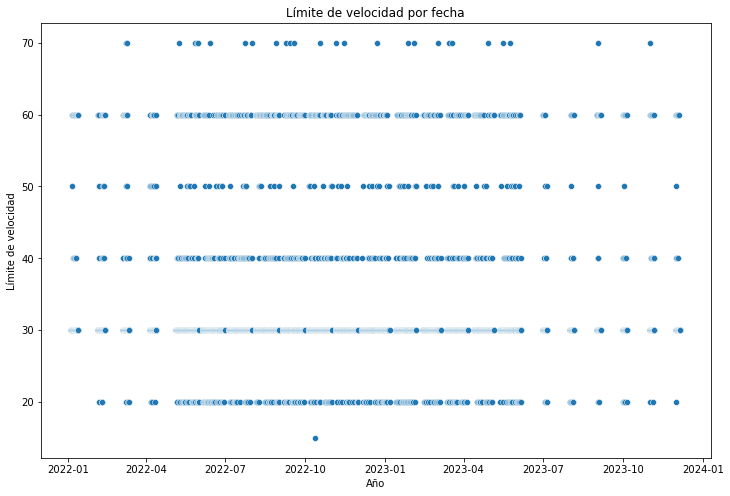

In [33]:
# Visualización de un scatter plot usando seaborn
fig = plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_plot, x = 'new_Accident_Date', y = 'Speed_limit')
plt.title('Límite de velocidad por fecha')
plt.xlabel('Año')  
plt.ylabel('Límite de velocidad')  
plt.show()

### 2.4.2 Diagrama de cajas (numérico vs. categórico)

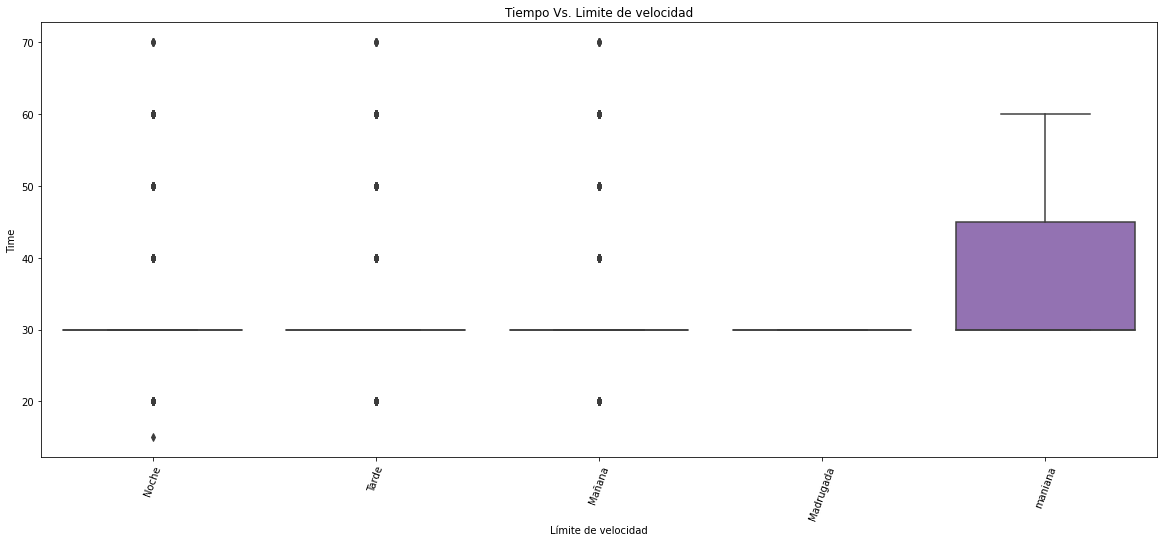

In [34]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="Time", y="Speed_limit", data=df_plot)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('Tiempo Vs. Limite de velocidad')
plt.xlabel('Límite de velocidad')  
plt.ylabel('Time')  
plt.show()

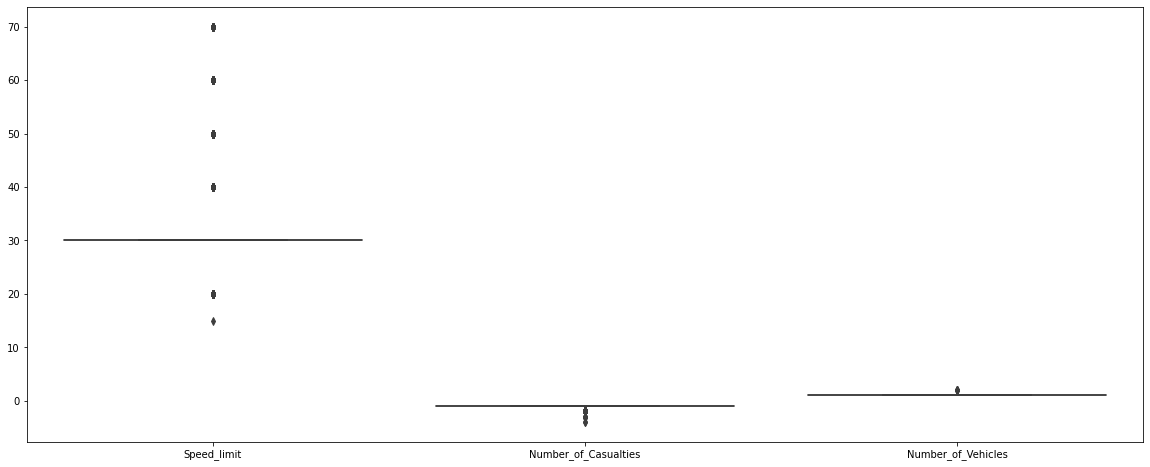

In [35]:
#Visualización de diferentes variables numéricas
fig=plt.figure(figsize=(20,8))
cols_numeric=['Speed_limit','Number_of_Casualties','Number_of_Vehicles'] 
df_sub_bicis = df_bicis[cols_numeric].copy()
ax = sns.boxplot(data=df_sub_bicis, orient="v")

### 2.4.3 Histogramas (numéricos)

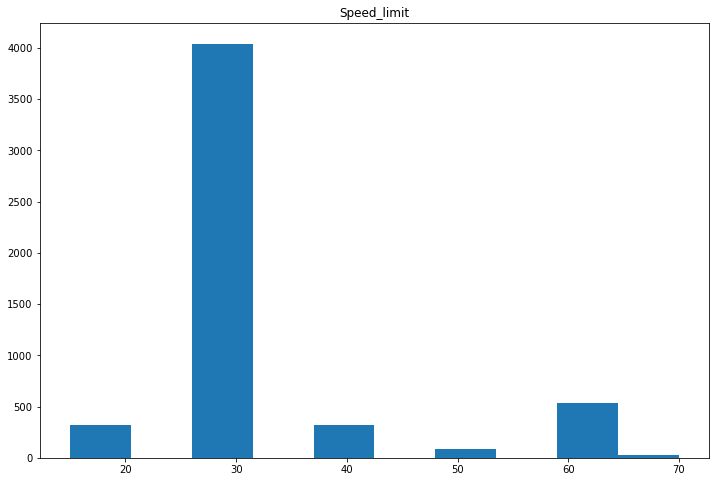

In [36]:
plt.figure(figsize = (12, 8))
plt.hist(df_plot['Speed_limit'], bins = 10)
plt.title('Speed_limit')  
plt.show()

<AxesSubplot:xlabel='Speed_limit', ylabel='Count'>

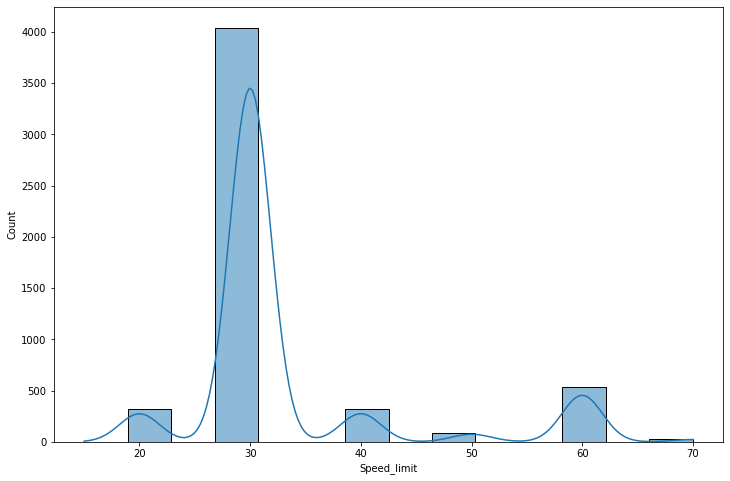

In [37]:
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_plot, x="Speed_limit", kde=True)

### 2.4.4 Mapa de calor (categórico vs. categórico vs. numérico)
Un uso común del heatmap es como matriz de correlación, sin embargo se puede usar para comparar una magnitud entre dos variables categóricas.

<AxesSubplot:>

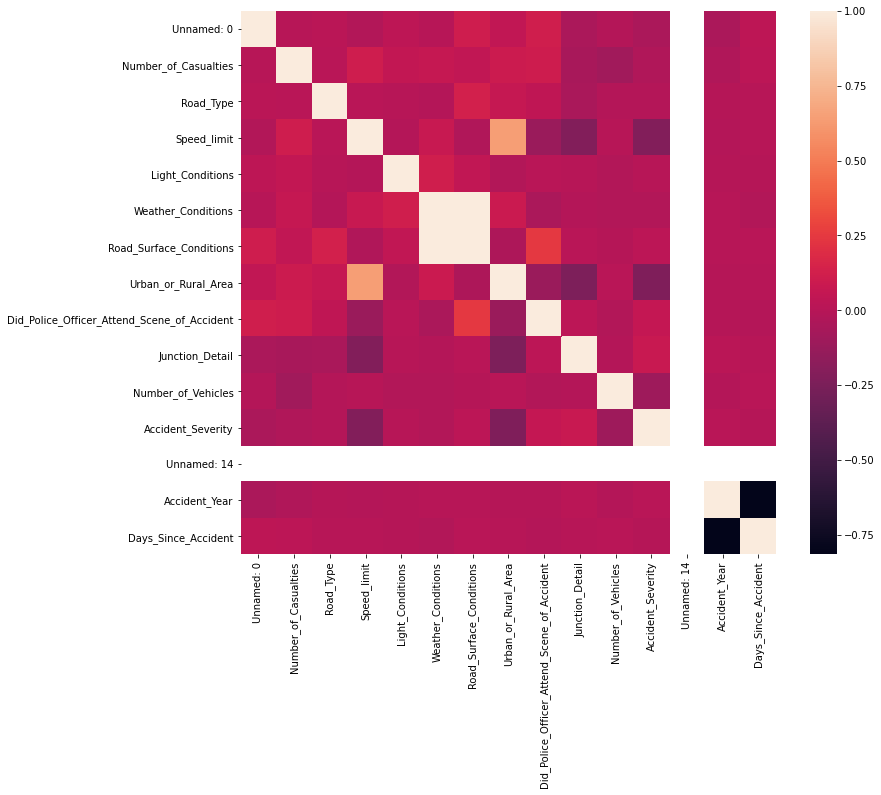

In [38]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_bicis.corr())
# Mira cómo se grafican las variables "Accident_Year" y "Days_Since_Accident"

### 2.4.5 ScatterPlots

<AxesSubplot:xlabel='Speed_limit', ylabel='Number_of_Casualties'>

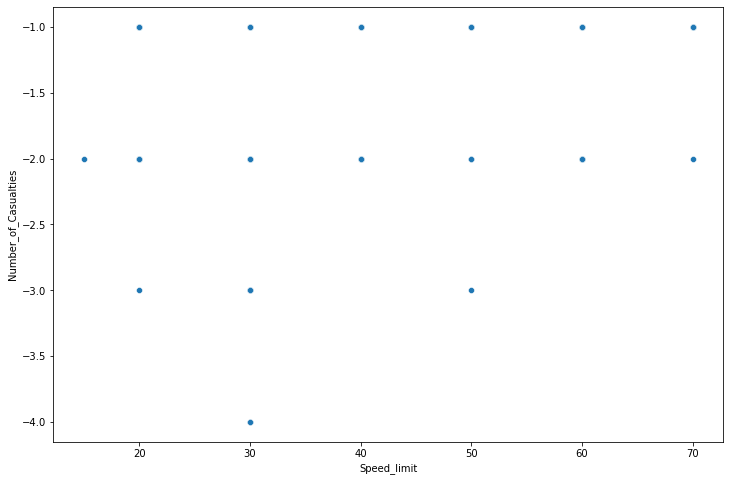

In [39]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df_plot, x="Speed_limit", y='Number_of_Casualties')

Al final del dia seaborn esta construido sobre matplotlib, por lo que esta ultima siempre va a ser mas poderosa. Si necesitan algo rápido: seaborn, algo muy especifico: matplotib.

## 3. Análisis de calidad de datos

## 3.1 Completitud
En este punto se identifican si existen problemas de completitud para reportarlos e identificar posibles soluciones que se trabajan en la etapa de preparación de datos


In [40]:
# Cálculo de porcentaje de valores nulos por columna
((df_bicis.isnull().sum()/df_bicis.shape[0])).sort_values(ascending=False)

Unnamed: 14                                    1.000000
Weather_Conditions                             0.015174
Day_of_Week                                    0.003559
Unnamed: 0                                     0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Accident_Year                                  0.000000
new_Accident_Date                              0.000000
Accident_Date                                  0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Junction_Detail                                0.000000
Vehicle_Type                                   0.000000
Time                                           0.000000
Urban_or_Rural_Area                            0.000000
Road_Surface_Conditions                        0.000000
Light_Conditions                               0.000000
Speed_limit                                    0.000000
Road_Type                                      0

Encontramos tres columnas con el problema de los datos nulos Unnamed, Weather_Conditions y Day_of_week

In [41]:
# Ver el porcentaje de atributos vacios
df_porcentajes = (100*df_bicis.isna().sum()/len(df_bicis)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

0
Unnamed: 14                                  100.000000
Weather_Conditions                             1.517422
Day_of_Week                                    0.355939
Unnamed: 0                                     0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Accident_Year                                  0.000000
new_Accident_Date                              0.000000
Accident_Date                                  0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Junction_Detail                                0.000000
Vehicle_Type                                   0.000000
Time                                           0.000000
Urban_or_Rural_Area                            0.000000
Road_Surface_Conditions                        0.000000
Light_Conditions                               0.000000
Speed_limit                                    0.000000
Road_Type                                      0.000000
Number_of_Casualties                           0.000000
Days_Since_Accident                            0.000000

#### Alternativas de solución
- Asignar Valores
Para los valores numericos, podemos remplazar los valores nulos con el promedio o con algún valor estadístico o constante sugerido por el comportamiento de los datos o expertos del negocio
- Eliminar registros
Si la fila o la columna tiene un porcentaje muy pequeño de valores vacios, se pueden eliminar.
- Eliminar columnas
Si la fila o la columna tiene un porcentaje alto de valores vacios, se puede eliminar.

#### Alternativas para el caso de BiciAlpes
- Eliminar la columna: Unnamed
- Eliminar los registros de la columna Day_of_Week
- Completar los registros de la columna Weather_conditions por recomendación del experto, se coloca un valor de -1

**Pregunta**
¿Qué se puede hacer con valores categoricos o de fecha para no eliminarlos?

## 3.2 Unicidad
Duplicados totales: Identificar cuantas filas repetidas hay de acuerdo con todas las columnas

In [42]:
df_bicis.duplicated(keep = False).sum()

0

In [43]:
# Duplicados parciales
numeric_cols=['Speed_limit','Number_of_Casualties','Number_of_Vehicles'] 
for col in numeric_cols:
    num_duplicated = df_bicis.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

Speed_limit: 5331
Number_of_Casualties: 5334
Number_of_Vehicles: 5336


¿Esto es un error? Quizás no.
¿Qué pasaría si se hiciera sobre una variable que identifica de forma única cada registro, se trataría de un verdadero duplicado?

In [44]:
# Mirar en detalle
# df_bicis[df_bicis.duplicated(subset = 'id', keep = False)].sort_values('id')

####  Alternativa de solución
 - Reportar los hallazgos al negocio y eliminar los duplicados

In [45]:
# Código sugerido
# df_bicis.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

## 3.3 Consistencia
La consistencia de los datos es definida en términos de la integridad de los datos entre diferentes filas o columnas de una fuente o varias fuentes.

In [46]:
#Revisemos la consistencia entre la hora del accidente que está en la variable Accident_DAte y la variable Time
#Creeemos dos nuevas columnas con la fecha y hora del accidente
df_bicis['Accident_Date_Date'], df_bicis['Accident_Date_Time'] = df_bicis['new_Accident_Date'].dt.normalize(), df_bicis['new_Accident_Date'].dt.time
print(df_bicis)

      Unnamed: 0    Time  Number_of_Casualties    Day_of_Week  Road_Type  \
0              0  Mañana                    -1    Día laboral          6   
1              1  Mañana                    -1    Día laboral          6   
2              2   Tarde                    -1  Fin de semana          6   
3              3   Tarde                    -2    Día laboral          6   
4              4  Mañana                    -2    Día laboral          6   
...          ...     ...                   ...            ...        ...   
5333        5333   Tarde                    -1    Día laboral          6   
5334        5334   Noche                    -2    Día laboral          6   
5335        5335   Tarde                    -1    Día laboral          6   
5336        5336   Noche                    -1    Día laboral          6   
5337        5337  Mañana                    -1    Día laboral          3   

      Speed_limit  Light_Conditions  Weather_Conditions  \
0            30.0           

In [47]:
#Creemos una nueva columna para determinar el Time del accidente.
# Usemos una función

In [48]:
df_bicis.dtypes

Unnamed: 0                                              int64
Time                                                   object
Number_of_Casualties                                    int64
Day_of_Week                                            object
Road_Type                                               int64
Speed_limit                                           float64
Light_Conditions                                        int64
Weather_Conditions                                    float64
Road_Surface_Conditions                                 int64
Urban_or_Rural_Area                                     int64
Vehicle_Type                                           object
Did_Police_Officer_Attend_Scene_of_Accident             int64
Junction_Detail                                         int64
Number_of_Vehicles                                      int64
Accident_Severity                                       int64
Unnamed: 14                                           float64
Accident

In [49]:
def calculate_time(row):
    hour = pd.to_datetime(row['Accident_Date_Time'], format='%H:%M:%S').hour
    if 0 <= hour <= 12:
        val = 'Mañana'
    elif 12 < hour <= 18:
        val = 'Tarde'
    else:
        val = 'Noche'
    return val

In [50]:
df_bicis['new_Time'] = df_bicis.apply(calculate_time, axis=1)

In [51]:
df_bicis['iguales'] = df_bicis['Time']==df_bicis['new_Time']

In [52]:
df_bicis['iguales'].value_counts()

False    3560
True     1778
Name: iguales, dtype: int64

Vemos que no hay consistencia entre las dos variables, así que hay que preguntar a BiciAlpes cuál de las dos columnas se debe utilizar. En este caso vamos a suponer que BIciAlpes dice que la variable 'Time'

Otro tipo de consistencia está relacionada con las variables de tipo string y las diferentes formas de escribirlas. Esto nos lleva a tener que estandarizar los datos.

#### 3.1 Categóricos

In [53]:
# Revisamos los valores de la unica variable categorica: mode
df_bicis['Time'].value_counts()

Tarde        2171
Mañana       1681
Noche        1477
Madrugada       6
maniana         3
Name: Time, dtype: int64

#### Alternativas de solución
Definir el formato a utilizar y llevar a todas la filas a cumplirlo
En este caso cambiar manianna  a Mañana

#### 3.2 Numéricos

In [54]:
# Resumen
df_bicis[number_cols].describe()

Speed_limit  Weather_Conditions  Unnamed: 14
count  5338.000000         5257.000000          0.0
mean     33.522855            1.224843          NaN
std      10.206576            0.528171          NaN
min      15.000000            1.000000          NaN
25%      30.000000            1.000000          NaN
50%      30.000000            1.000000          NaN
75%      30.000000            1.000000          NaN
max      70.000000            5.000000          NaN

**Ejercicio**
Rescalar la variable *Number_of_Vehicles* para que tenga como minimo 0 y como maximo 1

In [55]:
# Solucion
min_val = df_bicis['Number_of_Vehicles'].min()
max_val = df_bicis['Number_of_Vehicles'].max()
df_bicis['new_Number_of_Vehicles'] = (df_bicis['Number_of_Vehicles'] - min_val) / (max_val - min_val)


In [56]:
# Confirmar
df_bicis[['new_Number_of_Vehicles']].describe()

new_Number_of_Vehicles
count             5338.000000
mean                 0.001124
std                  0.033511
min                  0.000000
25%                  0.000000
50%                  0.000000
75%                  0.000000
max                  1.000000

## 3.4 Validez
Revisar que los valores asignados tengan sentido para el negocio.
Por ejemplo, se habla de un dato numérico de edad, pero tendrá sentido hablar de edades negativas o de valores superiores a  200?
Estos son errores de validez.

In [57]:
#Revisemos a nivel de los datos numéricos
df_bicis.describe()

Unnamed: 0  Number_of_Casualties    Road_Type  Speed_limit  \
count  5338.000000           5338.000000  5338.000000  5338.000000   
mean   2668.500000             -1.118022     5.587486    33.522855   
std    1541.092199              0.330694     1.416573    10.206576   
min       0.000000             -4.000000     1.000000    15.000000   
25%    1334.250000             -1.000000     6.000000    30.000000   
50%    2668.500000             -1.000000     6.000000    30.000000   
75%    4002.750000             -1.000000     6.000000    30.000000   
max    5337.000000             -1.000000     9.000000    70.000000   

       Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
count       5338.000000         5257.000000              5338.000000   
mean           1.712814            1.224843                 2.207756   
std            1.456428            0.528171                 7.936541   
min            1.000000            1.000000                 1.000000   
25%            1.000000            1.000000                 1.000000   
50%            1.000000            1.000000                 1.000000   
75%            1.000000            1.000000                 1.000000   
max            7.000000            5.000000                66.000000   

       Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
count          5338.000000                                  5338.000000   
mean              1.243162                                     1.247096   
std               0.429032                                     0.453389   
min               1.000000                                    -1.000000   
25%               1.000000                                     1.000000   
50%               1.000000                                     1.000000   
75%               1.000000                                     1.000000   
max               2.000000                                     3.000000   

       Junction_Detail  Number_of_Vehicles  Accident_Severity  Unnamed: 14  \
count      5338.000000         5338.000000        5338.000000          0.0   
mean          1.898464            1.001124           2.630761          NaN   
std           2.456249            0.033511           0.518214          NaN   
min          -1.000000            1.000000           1.000000          NaN   
25%           0.000000            1.000000           2.000000          NaN   
50%           0.000000            1.000000           3.000000          NaN   
75%           3.000000            1.000000           3.000000          NaN   
max           9.000000            2.000000           3.000000          NaN   

       Accident_Year  Days_Since_Accident  new_Number_of_Vehicles  
count    5338.000000          5338.000000             5338.000000  
mean     2022.368115           274.189397                0.001124  
std         0.482338           156.761319                0.033511  
min      2022.000000          -114.000000                0.000000  
25%      2022.000000           162.000000                0.000000  
50%      2022.000000           287.000000                0.000000  
75%      2023.000000           394.000000                0.000000  
max      2023.000000           586.000000                1.000000

El valor de Number_of_Casualties es negativo y todos los valores lo son.
Al revisarlo con BiciAlpes nos confirman que es un error y que esa columna debe ser multiplicada por -1
De igual manera, vemos que el máximo valor de Road_Surface_Conditions es 66 y en el diccionario es "6", así que debemos corregirlo. En este caso la respuesta dada por BiciAlpes es que ese valor debe ser 6.

En este punto como caso especial tendremos la diferencia de formatos en las variables fecha, que tratamos al prinicipio de este Cuaderno.

## 4. Reportes Automáticos para realizar el entendimiento de los datos

Para los reportes automáticos, se puede usar al herramienta de pandas profiling.


Para cada columna, genera las siguientes estadísticas, si son relevantes para el tipo de columna, se presentan en un informe HTML interactivo:

1. Inferencia de tipo: detecta los tipos de columnas en un dataframe.
2. Esenciales: tipo, valores únicos, valores faltantes.
3. Estadísticas de cuantiles como valor mínimo, Q1, mediana, Q3, máximo, rango, rango intercuartílico. Esta opción es bastante útil para identificar datos atípicos.
4. Estadísticas descriptivas como media, moda, desviación estándar, suma, desviación absoluta mediana, coeficiente de variación, curtosis, asimetría.
5. Valores más frecuentes.
6. Histogramas.
7. Correlaciones destacando variables altamente correlacionadas, matrices de Spearman, Pearson y Kendall. Esto permite descubrir relaciones entre atributos.
8. Matriz de valores faltantes, recuento, mapa de calor y dendrograma de valores faltantes

Tomado de la librería oficial de pandas_profiling en [github](https://github.com/pandas-profiling/pandas-profiling)

Lo más importante al utilizar esta librería es recordar que lo fundamental son los análisis que hagamos sobre estos reportes.

In [58]:
import pandas_profiling

profiling =pandas_profiling.ProfileReport(df_bicis)
profiling

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
profiling.to_file("BiciAlpes_db_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]